No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

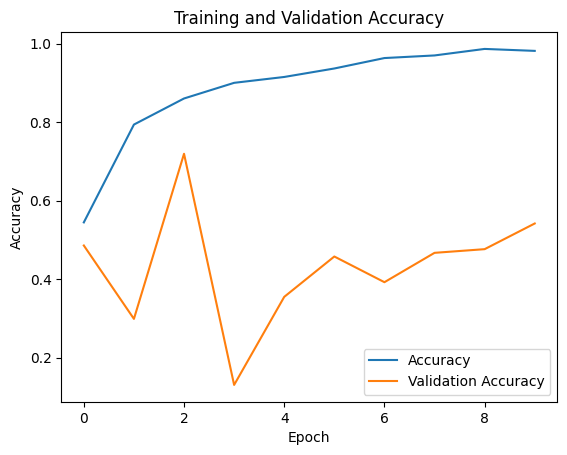

23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step


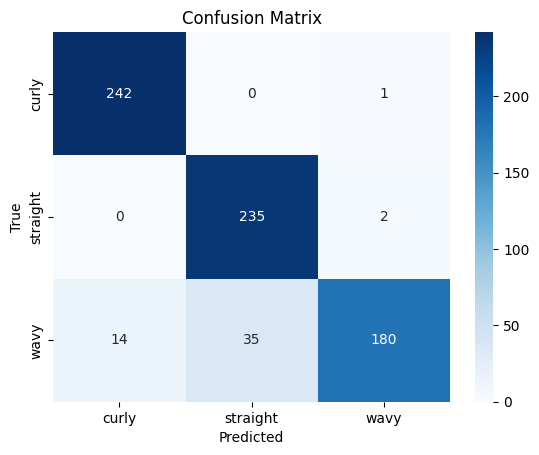

              precision    recall  f1-score   support

       curly       0.95      1.00      0.97       243
    straight       0.87      0.99      0.93       237
        wavy       0.98      0.79      0.87       229

    accuracy                           0.93       709
   macro avg       0.93      0.92      0.92       709
weighted avg       0.93      0.93      0.92       709



In [1]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the VGG16 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of VGG16
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate Precision, Recall, and F1-Score for the entire dataset
precision = precision_score(labels, predicted_labels, average='weighted')
recall = recall_score(labels, predicted_labels, average='weighted')
f1 = f1_score(labels, predicted_labels, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")




NameError: name 'model' is not defined

No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

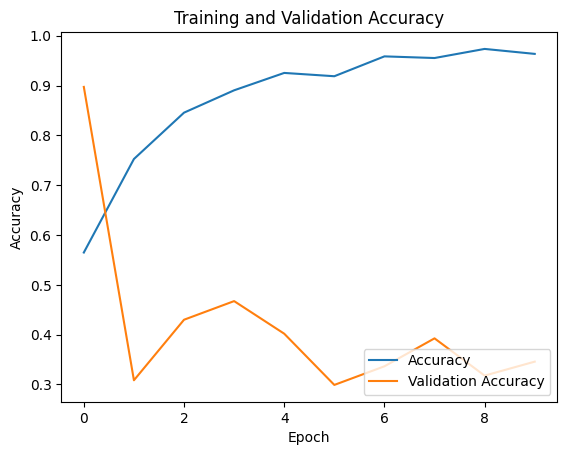

23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step


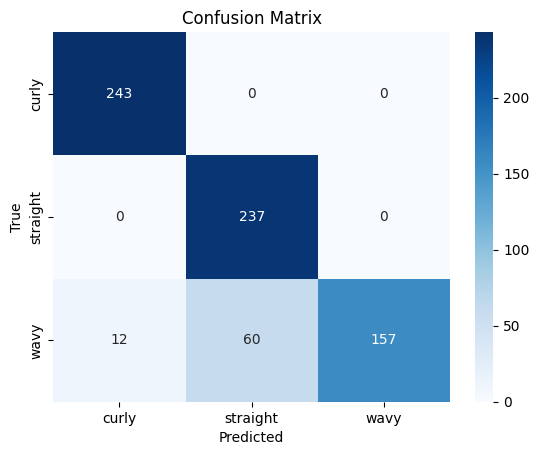

              precision    recall  f1-score   support

       curly       0.95      1.00      0.98       243
    straight       0.80      1.00      0.89       237
        wavy       1.00      0.69      0.81       229

    accuracy                           0.90       709
   macro avg       0.92      0.90      0.89       709
weighted avg       0.92      0.90      0.89       709



In [4]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the VGG16 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of VGG16
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

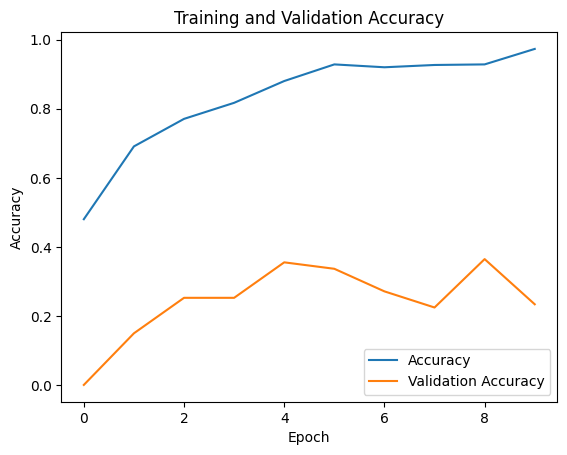

23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step


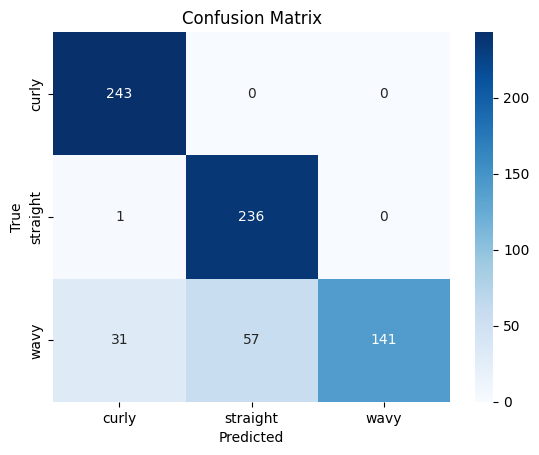

              precision    recall  f1-score   support

       curly       0.88      1.00      0.94       243
    straight       0.81      1.00      0.89       237
        wavy       1.00      0.62      0.76       229

    accuracy                           0.87       709
   macro avg       0.90      0.87      0.86       709
weighted avg       0.90      0.87      0.87       709



In [6]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the VGG16 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of VGG16
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [8]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the ResNet50 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of ResNet50
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

MemoryError: Unable to allocate 407. MiB for an array with shape (709, 224, 224, 3) and data type float32